# **Decision Tree Specialty Coffee Case Study**




In [58]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [7]:
df = pd.read_csv('data/RRDinerCoffeeData.csv')

In [8]:
df.head()

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0


In [9]:
df.shape

(702, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_week               702 non-null    int64  
 4   spent_month              702 non-null    int64  
 5   SlrAY                    702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.5+ KB


In [11]:
df.describe()

,Age,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,474.000000
mean,34.243590,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339,0.639241
std,13.927945,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373,0.480728
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,23.000000,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000,0.000000
50%,28.000000,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000,1.000000
75%,46.000000,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000,1.000000
max,90.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000,1.000000


In [12]:
# Col names
df.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [13]:
# Make the relevant name changes to spent_week and spent_per_week.
df = df.rename(
    columns = {old_name : new_name for old_name, new_name in 
               zip(['spent_week', 'spent_month', 'SlrAY'], ['spent_last_week', 'spent_last_month', 'salary'])}
)

In [14]:
df.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [21]:
# Gender column's unique values 
df.Gender.unique()

array(['Female', 'Male', 'female', 'F', 'f ', 'FEMALE', 'MALE', 'male',
       'M'], dtype=object)

In [22]:
# Replace all alternate values for the Female entry with 'Female'
df['Gender'] = df['Gender'].replace(['female','F','f','f ','FEMALE'], 'Female')

In [23]:
# Replace all alternate values with "Male"
df['Gender'] = df['Gender'].replace(['MALE','male','M'], 'Male')

In [24]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [27]:
# Unique values of the column 'Decision'
df.Decision.unique()

array(['YES', nan, 'NO'], dtype=object)

In [28]:
# Replace 1.0 and 0.0 by 'Yes' and 'No'
df.loc[df['Decision'] == 1.0,'Decision'] = 'YES'
df.loc[df['Decision'] == 0.0, 'Decision'] = 'NO'

In [29]:
df.Decision.unique()

array(['YES', nan, 'NO'], dtype=object)

In [31]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing.sort_values(by= 'Count', ascending= False)

,Count,%
Decision,228,32.478632
Age,0,0.000000
Gender,0,0.000000
num_coffeeBags_per_year,0,0.000000
spent_last_week,0,0.000000
spent_last_month,0,0.000000
salary,0,0.000000
Distance,0,0.000000
Online,0,0.000000


In [38]:
df_dropna = df.dropna()
df_dropna['Decision'].describe()

count     474
unique      2
top       YES
freq      303
Name: Decision, dtype: object

<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      474 non-null    int64  
 1   Gender                   474 non-null    object 
 2   num_coffeeBags_per_year  474 non-null    int64  
 3   spent_last_week          474 non-null    int64  
 4   spent_last_month         474 non-null    int64  
 5   salary                   474 non-null    int64  
 6   Distance                 474 non-null    float64
 7   Online                   474 non-null    int64  
 8   Decision                 474 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 37.0+ KB


<Axes: xlabel='Decision', ylabel='spent_last_week'>

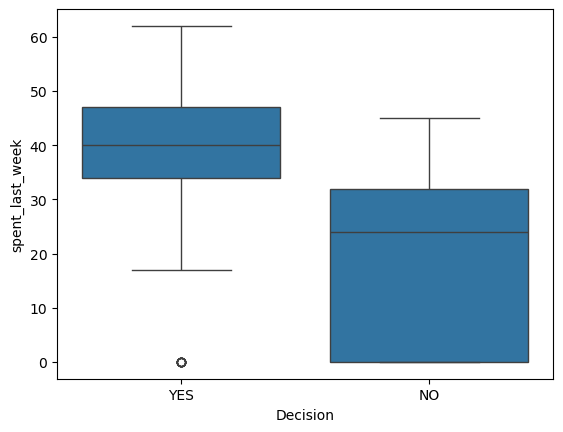

In [39]:
# Boxplot decision over spent last week
df_dropna.info()
sns.boxplot(
    x = 'Decision', 
    y = 'spent_last_week', 
    data = df_dropna)

Can you admissibly conclude anything from this boxplot? Write your answer here:



<Axes: xlabel='Distance', ylabel='spent_last_month'>

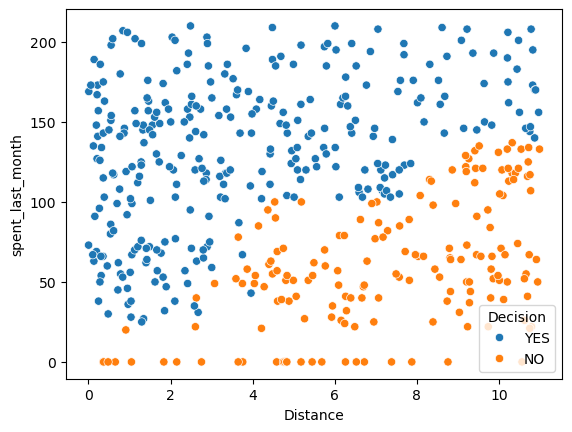

In [40]:
# Scatterplot between distance and spent_last_month; hue is Decision 
sns.scatterplot(
    x = 'Distance', 
    y = 'spent_last_month', 
    data = df_dropna, 
    hue = 'Decision')

In [41]:
# Null values in decision column
df_na = df[df['Decision'].isnull()]

In [42]:
df_na.describe()

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,31.802632,2.960526,33.394737,110.407895,41923.741228,3.428836,0.570175
std,14.302293,1.585514,15.697930,53.786536,27406.768360,2.153102,0.496140
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.010048,0.000000
25%,22.000000,2.000000,25.750000,65.000000,15911.500000,1.699408,0.000000
50%,25.000000,3.000000,37.000000,113.500000,40987.500000,3.208673,1.000000
75%,39.000000,4.000000,44.000000,151.250000,58537.000000,5.261184,1.000000
max,67.000000,5.000000,62.000000,210.000000,182058.000000,10.871566,1.000000


In [43]:
df_dropna.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [44]:
# Predictor variable
features = [column for column in df_dropna.columns if column != 'Decision']
X = df_dropna[features]

# Target Variable
y = df_dropna.Decision

In [45]:
# One-hot encode all features in X.
X = pd.get_dummies(X)


In [46]:
# Test_size = 0.25, random_state = 246
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 246)

In [47]:
# Decision Tree
entr_model = tree.DecisionTreeClassifier(criterion = 'entropy', random_state= 1234 )
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

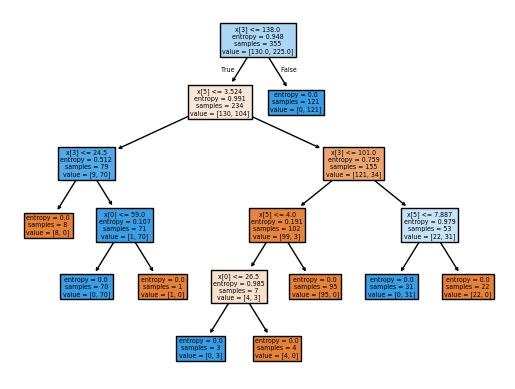

In [ ]:
# Visualize the tree
import graphviz

tree.plot_tree(entr_model, filled = True)

dot_data = tree.export_graphviz(entr_model, out_file = None)
graphviz.Source(dot_data)

dot_data = tree.export_graphviz(entr_model, out_file = None, class_names = entr_model.classes_)
graphviz.Source(dot_data)

## Model 1: Entropy model - no max_depth: Interpretation and evaluation

In [91]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy - no max depth
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score for "Yes" 0.9873417721518988
Precision score for "No" 1.0
Recall score for "Yes" 1.0
Recall score for "No" 0.975609756097561


What can you infer from these results? Write your conclusions here:

## Model 2: Gini impurity model - no max_depth

Gini impurity, like entropy, is a measure of how well a given feature (and threshold) splits the data into categories.

Their equations are similar, but Gini impurity doesn't require logorathmic functions, which can be computationally expensive. 

In [92]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model =  tree.DecisionTreeClassifier(criterion = 'gini', random_state = 1234)

# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train) 

# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_model.predict(X_test) 

# Turn y_pred into a series, as before
y_pred = pd.Series(y_pred)

# Check out gini_model
gini_model

DecisionTreeClassifier(random_state=1234)

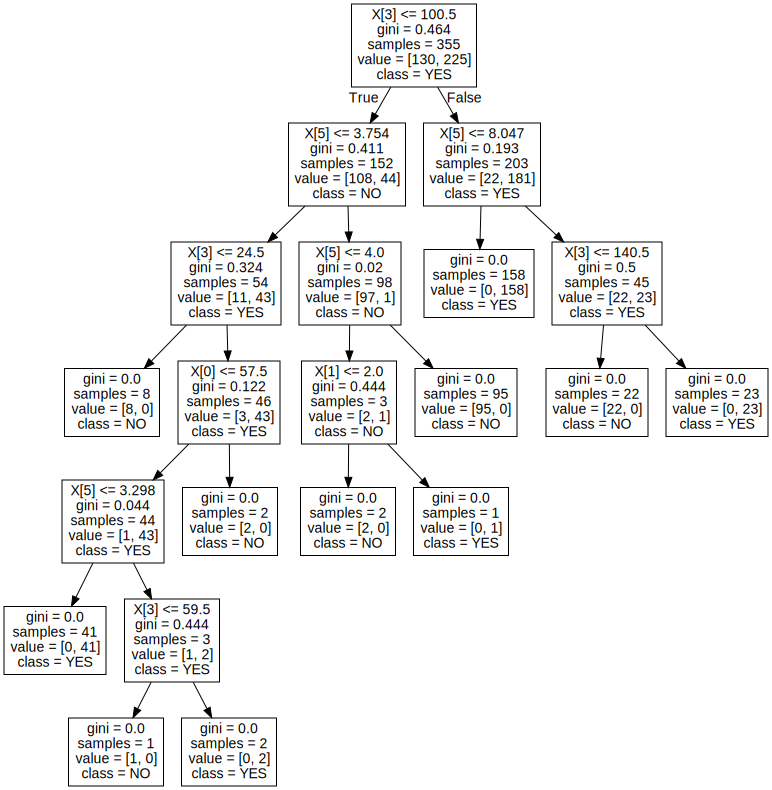

In [93]:
# As before, but make the model name gini_model
dot_data = tree.export_graphviz(gini_model, out_file = None)
graphviz.Source(dot_data)

# Alternatively for class_names use gini_model.classes_
dot_data = tree.export_graphviz(gini_model, out_file = None, class_names = gini_model.classes_)
graphviz.Source(dot_data)

In [94]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Gini impurity model
Accuracy: 0.9831932773109243
Balanced accuracy: 0.9813946216385241
Precision score 0.9871794871794872
Recall score 0.975609756097561


How do the results here compare to the previous model? Write your judgements here: 

## Model 3: Entropy model - max depth 3
We're going to try to limit the depth of our decision tree, using entropy first.  

As you know, we need to strike a balance with tree depth. 

Insufficiently deep, and we're not giving the tree the opportunity to spot the right patterns in the training data.

Excessively deep, and we're probably going to make a tree that overfits to the training data, at the cost of very high error on the (hitherto unseen) test data. 

Sophisticated data scientists use methods like random search with cross-validation to systematically find a good depth for their tree. We'll start with picking 3, and see how that goes. 

In [95]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
entr_model2 = tree.DecisionTreeClassifier(criterion='entropy', random_state=1234, max_depth=3)

entr_model2.fit(X_train, y_train)
y_pred = entr_model2.predict(X_test)

y_pred = pd.Series(y_pred)

entr_model2

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)

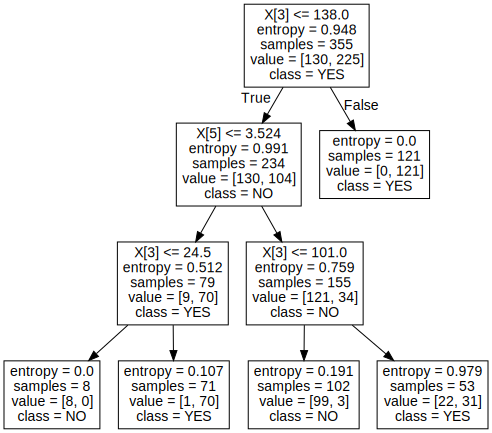

In [96]:
# As before, we need to visualize the tree to grasp its nature
graphviz.Source(tree.export_graphviz(entr_model2, out_file = None))

# Alternatively for class_names use entr_model2.classes_
graphviz.Source(tree.export_graphviz(entr_model2, out_file=None, class_names=entr_model2.classes_))

In [97]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy model max depth 3
Accuracy: 0.907563025210084
Balanced accuracy: 0.8658536585365854
Precision score for "Yes" 0.8764044943820225
Recall score for "No" 0.7317073170731707


So our accuracy decreased, but is this certainly an inferior tree to the max depth original tree we did with Model 1? Write your conclusions here: 

## Model 4: Gini impurity  model - max depth 3
We're now going to try the same with the Gini impurity model. 

In [98]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 1234, max_depth = 3)

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)

y_pred = gini_model2.predict(X_test)
y_pred = pd.Series(y_pred)

gini_model2

DecisionTreeClassifier(max_depth=3, random_state=1234)

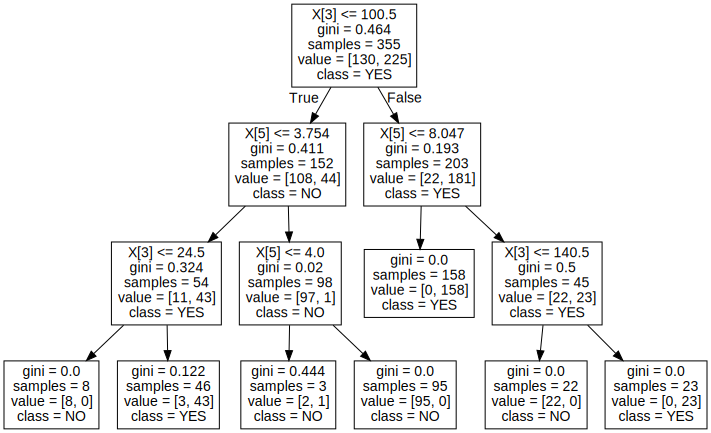

In [99]:
dot_data = StringIO()
graphviz.Source(dot_data)

# Alternatively for class_names use gini_model2.classes_
dot_data = tree.export_graphviz(gini_model2, out_file=None, class_names=gini_model2.classes_)
graphviz.Source(dot_data)

In [100]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Gini impurity  model - max depth 3
Accuracy: 0.9747899159663865
Balanced accuracy: 0.9691994996873046
Precision score 0.9746835443037974
Recall score 0.9512195121951219


Now this is an elegant tree. Its accuracy might not be the highest, but it's still the best model we've produced so far. Why is that? Write your answer here: 

# 4. Evaluating and concluding
## 4a. How many customers will buy Hidden Farm coffee? 
Let's first ascertain how many loyal customers claimed, in the survey, that they will purchase the Hidden Farm coffee. 

In [101]:
# Call value_counts() on the 'Decision' column of the original coffeeData
df['Decision'].value_counts()

YES    303
NO     171
Name: Decision, dtype: int64

Let's now determine the number of people that, according to the model, will be willing to buy the Hidden Farm coffee. 
1. First we subset the Prediction dataset into `new_X` considering all the variables except `Decision` 
2. Use that dataset to predict a new variable called `potential_buyers`

In [102]:
# Feature selection
# Make a variable called feature_cols, and assign it a list containing all the column names except 'Decision'
feature_cols = [column for column in df.columns if column != 'Decision']

# Make a variable called new_X, and assign it the subset of Prediction, containing just the feature_cols 
new_X = Prediction[feature_cols]

In [103]:
# Call get_dummies() on the Pandas object pd, with new_X plugged in, to one-hot encode all features in the training set
new_X = pd.get_dummies(new_X)

# Make a variable called potential_buyers, and assign it the result of calling predict() on a model of your choice; 
# don't forget to pass new_X to predict()
potential_buyers = gini_model2.predict(new_X)

In [104]:
# Let's get the numbers of YES's and NO's in the potential buyers 
# Call unique() on np, and pass potential_buyers and return_counts=True 
np.unique(potential_buyers, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([ 45, 183]))

The total number of potential buyers is 303 + 183 = 486

In [105]:
# Print the total number of surveyed people 
len(df)

702

In [106]:
# Let's calculate the proportion of buyers
486/702

0.6923076923076923

In [107]:
# Print the percentage of people who want to buy the Hidden Farm coffee, by our model 
buyers = len(potential_buyers[potential_buyers=='YES'])
total = len(potential_buyers)
buyers/total 

0.8026315789473685

## 4b. Decision
Remember how you thought at the start: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. Well now's crunch time. Are you going to go ahead with that idea? If so, you won't be striking the deal with the Chinese farmers. 

They're called `decision trees`, aren't they? So where's the decision? What should you do? (Cue existential cat emoji). 

Ultimately, though, we can't write an algorithm to actually *make the business decision* for us. This is because such decisions depend on our values, what risks we are willing to take, the stakes of our decisions, and how important it us for us to *know* that we will succeed. What are you going to do with the models you've made? Are you going to risk everything, strike the deal with the *Hidden Farm* farmers, and sell the coffee? 

The philosopher of language Jason Stanley once wrote that the number of doubts our evidence has to rule out in order for us to know a given proposition depends on our stakes: the higher our stakes, the more doubts our evidence has to rule out, and therefore the harder it is for us to know things. We can end up paralyzed in predicaments; sometimes, we can act to better our situation only if we already know certain things, which we can only if our stakes were lower and we'd *already* bettered our situation. 

Data science and machine learning can't solve such problems. But what it can do is help us make great use of our data to help *inform* our decisions.

## 5. Random Forest
You might have noticed an important fact about decision trees. Each time we run a given decision tree algorithm to make a prediction (such as whether customers will buy the Hidden Farm coffee) we will actually get a slightly different result. This might seem weird, but it has a simple explanation: machine learning algorithms are by definition ***stochastic***, in that their output is at least partly determined by randomness. 

To account for this variability and ensure that we get the most accurate prediction, we might want to actually make lots of decision trees, and get a value that captures the centre or average of the outputs of those trees. Luckily, there's a method for this, known as the ***Random Forest***. 

Essentially, Random Forest involves making lots of trees with similar properties, and then performing summary statistics on the outputs of those trees to reach that central value. Random forests are hugely powerful classifers, and they can improve predictive accuracy and control over-fitting. 

Why not try to inform your decision with random forest? You'll need to make use of the RandomForestClassifier function within the sklearn.ensemble module, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

### 5a. Import necessary modules

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### 5b. Model
You'll use your X_train and y_train variables just as before.

You'll then need to make a variable (call it firstRFModel) to store your new Random Forest model. You'll assign this variable the result of calling RandomForestClassifier().

Then, just as before, you'll call fit() on that firstRFModel variable, and plug in X_train and y_train.

Finally, you should make a variable called y_pred, and assign it the result of calling the predict() method on your new firstRFModel, with the X_test data passed to it. 

In [109]:
# Plug in appropriate max_depth and random_state parameters 
RFModel = RandomForestClassifier(max_depth = 3, random_state = 1234)

# Model and fit
RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
print('Random Forest model - max depth 3')
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))


Random Forest model - max depth 3
Accuracy: 0.9411764705882353
Balanced accuracy: 0.9204190118824265
Precision score 0.927710843373494
Recall score 0.8536585365853658


In [110]:
RF_potential_buyers = RFModel.predict(new_X)
buyers = len(RF_potential_buyers[RF_potential_buyers=='YES'])
total = len(RF_potential_buyers)
buyers/total

0.8289473684210527

### 5c. Revise conclusion

Has your conclusion changed? Or is the result of executing random forest the same as your best model reached by a single decision tree? 

The percentage of potential buyers has increased from 80.26% to 82.89% in a Random Forest model. Therefore, RR should purchase Hidden Farm coffee.